# Preprocessing danych, inżynieria cech i wstępne modelowanie


## 1. wczytanie danych

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../data/our_data.csv")

In [4]:
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.275030,-0.048205,-0.104989,-0.078712,0.147527,-0.268389,-0.145985,0.223070,-0.245475,0.054535,...,0.186528,0.041501,-0.242181,-0.107090,0.488465,-0.971117,0.920094,-0.786650,0.244342,0.037616
1,0.265267,-0.039533,-0.055622,-0.153174,0.136032,-0.188985,-0.195430,0.213643,-0.193541,0.291933,...,0.248442,0.352116,0.157372,0.023030,0.457693,0.706198,-0.281509,-0.764021,0.258142,0.050204
2,0.278719,-0.016347,-0.105631,-0.996845,-0.984686,-0.991374,-0.997012,-0.984279,-0.991043,-0.941030,...,0.538921,-0.802863,-0.974110,-0.309165,0.061915,-0.032188,0.330297,-0.608431,-0.160914,-0.071041
3,0.273204,-0.012032,-0.137018,-0.502654,-0.083456,-0.606272,-0.531081,-0.058082,-0.597897,-0.384713,...,0.332548,0.256056,0.030980,0.158134,-0.702547,0.296602,0.464166,-0.845954,0.158648,-0.074060
4,0.279222,-0.005795,-0.092436,-0.996173,-0.969167,-0.980864,-0.996487,-0.969335,-0.978718,-0.939277,...,-0.015343,0.080477,-0.185231,0.010776,-0.255061,0.253623,0.376215,-0.796369,0.213405,-0.065949
5,0.376920,-0.032645,-0.064039,0.289539,0.053635,-0.471835,0.272506,0.016392,-0.492155,0.434334,...,0.419752,-0.567567,-0.846305,-0.582829,0.232542,-0.961077,-0.351361,-0.758606,0.260774,0.055919
6,0.201452,-0.001853,-0.097824,-0.310171,0.085567,0.003675,-0.334213,-0.012717,0.021686,0.190942,...,0.139709,0.023771,-0.321909,0.785811,-0.106120,0.218318,0.243933,-0.828063,0.217010,0.018205
7,0.253857,-0.018867,-0.106338,-0.978236,-0.982791,-0.989215,-0.979191,-0.981098,-0.987429,-0.931253,...,0.200474,-0.393497,-0.773619,0.093570,0.202408,0.046260,0.078579,0.439278,-0.300457,-0.696604
8,0.270431,-0.017142,-0.102501,-0.996208,-0.997446,-0.991789,-0.996763,-0.996878,-0.991797,-0.939951,...,0.450096,-0.316833,-0.525245,-0.033310,0.062593,0.125413,0.049282,-0.082511,-0.321670,-0.408151
9,0.275434,-0.009838,-0.104469,-0.996053,-0.974574,-0.986158,-0.996657,-0.976143,-0.986471,-0.941855,...,0.544750,-0.535775,-0.747393,-0.012382,0.086768,-0.369068,0.662941,-0.798128,0.037706,-0.115616


## 2. preprocessing 

Nasze dane są już znormalizowane oraz nie ma danych kategorycznych, zatem tymi krokami nie musimy się zajmować.

## 3. feature selection

Przypomnienie kolumn:
- tBodyAcc-XYZ
- tBodyAccJerk-XYZ
- tBodyAccMag
- tBodyAccJerkMag
- tGravityAcc-XYZ
- tGravityAccMag
- tBodyGyro-XYZ
- tBodyGyroJerk-XYZ
- tBodyGyroMag
- tBodyGyroJerkMag 

- fBodyAcc-XYZ
- fBodyAccJerk-XYZ
- fBodyAccMag
- fBodyAccJerkMag
- fBodyGyro-XYZ
- fBodyGyroMag
- fBodyGyroJerkMag

Przedrostek 't': sygnał w domenie czasu, 'f': sygnał w domenie częstotliwości po tranformacji fouriera (był wzór poprzednio, przekształca funckje czasową w funkcję częstotliwości).

Dla każdego sygnału mamy dane następujące statystyki:
- max()
- mad() - mediana odchylenia bezwzględnego
- min()
- kurtosis() - jedna z miar kształtu rozkładu częstotliwości sygnału 
- bandsEnergy() - energia przedziału częstotliwości w przedziałach FFT każdego okna
- mean()
- meanFreq()
- arCoeff() - współczynnik autoregresji
- entropy() - entropia sygnału, średnia ilość informacji przypadająca na pojedynczą wiadomość ze źródła
- iqr() - $Q_3 - Q_1 $
- sma() - obszar wielkości sygnału
- std()
- maxInds - indeks składowej częstotliwości o największej wartości
- skewness()
- energy()
- correlation()

Powinniśmy się zatem skupić na tym dla jakich sygnałów ważna będzie informacja w domenie czasowej, częstotliwości albo w obu domenach oraz jakie statystyki chcemy z tych sygnałów analizować.

In [5]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,...,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000
mean,0.274103,-0.017655,-0.108947,-0.607123,-0.509124,-0.612027,-0.632903,-0.524808,-0.614074,-0.466417,...,0.127117,-0.297867,-0.616229,0.006829,0.004443,0.018603,-0.011860,-0.498934,0.064577,-0.052189
std,0.066910,0.036158,0.052625,0.438765,0.500023,0.403949,0.413571,0.483662,0.399073,0.538331,...,0.244383,0.322860,0.312029,0.336948,0.447195,0.619526,0.488777,0.507037,0.305688,0.267176
min,-1.000000,-0.684893,-1.000000,-0.999897,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.995100,-1.000000,-1.000000,-0.980143
25%,0.262541,-0.024813,-0.121268,-0.992363,-0.976572,-0.978808,-0.993300,-0.976516,-0.978755,-0.935811,...,-0.017198,-0.538592,-0.842712,-0.124403,-0.282621,-0.498327,-0.399412,-0.816076,0.005303,-0.127309
50%,0.277126,-0.017161,-0.108596,-0.942089,-0.829841,-0.848572,-0.947026,-0.839508,-0.843087,-0.874812,...,0.136506,-0.334090,-0.703422,0.008115,0.008280,0.021011,-0.010695,-0.715126,0.184443,-0.002696
75%,0.288451,-0.010595,-0.097618,-0.250242,-0.056243,-0.277974,-0.300119,-0.085257,-0.287795,-0.014697,...,0.287357,-0.109512,-0.486867,0.149005,0.290676,0.540897,0.369579,-0.523540,0.251357,0.103462
max,0.680266,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,1.000000,1.000000,1.000000,0.999756,1.000000


z sygnałów bym zostawił 
- tBodyAcc
- tBodyAccMag
- tBodyAccJerkMag
- tGravityAcc
- tGravityAccMag
- tBodyGyro
- tBodyGyroJerk

- fBodyAccJerk
- fBodyAccMag
- fBodyAccJerkMag

ale póki co puszcze na wszystkim

ze statystyk skupiłbym się na średniej i odchyleniu standardowym, gdyż dosyć dokładnie opisują daną aktywność.

### Selekcja cech

In [6]:
to_drop = [t for t in data.columns if not ('std' in t or 'mean' in t)]

In [7]:
data.drop(to_drop, axis=1, inplace=True)
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,...,fBodyAccMag-meanFreq(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-meanFreq()
0,0.275030,-0.048205,-0.104989,-0.078712,0.147527,-0.268389,0.944385,-0.233564,-0.022744,-0.972907,...,0.096909,-0.366235,-0.433908,-0.109638,-0.358260,-0.322019,-0.222474,-0.610230,-0.683597,0.186528
1,0.265267,-0.039533,-0.055622,-0.153174,0.136032,-0.188985,0.931664,-0.252384,-0.040596,-0.975350,...,0.400535,-0.055673,0.026550,0.213070,-0.246045,-0.260619,0.200696,-0.352790,-0.411327,0.248442
2,0.278719,-0.016347,-0.105631,-0.996845,-0.984686,-0.991374,0.846088,0.344366,0.130538,-0.997269,...,0.332373,-0.994595,-0.994596,0.522191,-0.993451,-0.990949,-0.051524,-0.996629,-0.997937,0.538921
3,0.273204,-0.012032,-0.137018,-0.502654,-0.083456,-0.606272,0.962853,-0.109587,0.137276,-0.994030,...,0.508290,-0.350802,-0.368434,0.162513,-0.609152,-0.609941,0.049027,-0.753804,-0.748687,0.332548
4,0.279222,-0.005795,-0.092436,-0.996173,-0.969167,-0.980864,0.956206,-0.190088,0.126213,-0.997785,...,-0.093881,-0.990037,-0.992108,0.500988,-0.982768,-0.974651,-0.444514,-0.992285,-0.991380,-0.015343
5,0.376920,-0.032645,-0.064039,0.289539,0.053635,-0.471835,0.920378,-0.254521,-0.048382,-0.914728,...,0.091015,-0.039572,-0.196947,0.172808,-0.363850,-0.403481,0.063233,-0.583132,-0.683646,0.419752
6,0.201452,-0.001853,-0.097824,-0.310171,0.085567,0.003675,0.965031,-0.195369,0.005077,-0.979230,...,0.167911,-0.027010,0.043658,-0.222582,-0.155207,-0.334938,0.352194,-0.100553,-0.056575,0.139709
7,0.253857,-0.018867,-0.106338,-0.978236,-0.982791,-0.989215,-0.260409,0.523340,0.858101,-0.980861,...,-0.051832,-0.992684,-0.993757,0.341321,-0.988561,-0.988873,0.056115,-0.990678,-0.991710,0.200474
8,0.270431,-0.017142,-0.102501,-0.996208,-0.997446,-0.991789,0.400769,0.546274,0.569289,-0.995674,...,0.289712,-0.998427,-0.998913,0.652630,-0.992842,-0.990615,-0.108032,-0.997192,-0.997484,0.450096
9,0.275434,-0.009838,-0.104469,-0.996053,-0.974574,-0.986158,0.945980,0.067615,0.195622,-0.997968,...,0.154427,-0.989938,-0.990523,0.437081,-0.994284,-0.992107,-0.156655,-0.996830,-0.997738,0.544750


## 4. Prosty model

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
def scatter(x, labels):
    
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=labels)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

In [10]:
pca = PCA(n_components=2)
digits_proj_pca = pca.fit_transform(data)

### KMeans

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


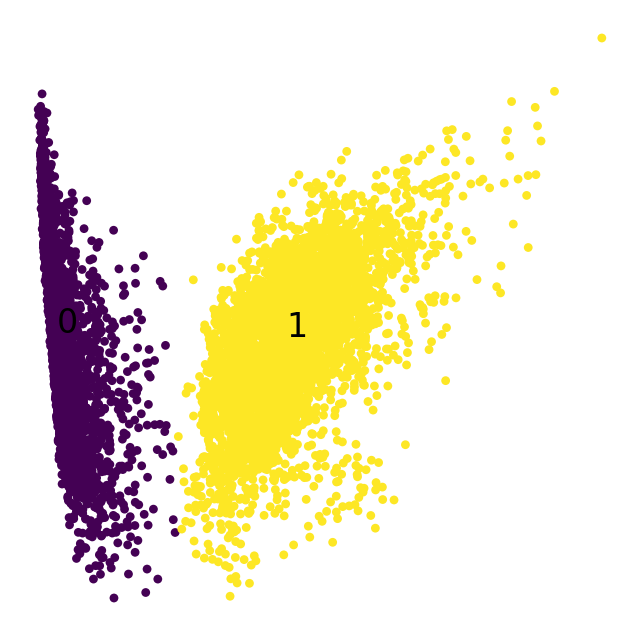

In [12]:
scatter(digits_proj_pca, y_kmeans)
plt.show()

---

## 5. Modelowanie

In [13]:
data = pd.read_csv("../data/our_data.csv")
data.drop(to_drop, axis=1, inplace=True)

### 5.1 `PCA`

In [14]:
pca = PCA(n_components=0.95) #zachowujemy 95% wariancji
data_pca = pca.fit_transform(data)
data = pd.DataFrame(data_pca)

In [15]:
data_pca.shape

(8239, 16)

### 5.2 `KMeans`

#### 5.2.1 metoda łokcia

In [16]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

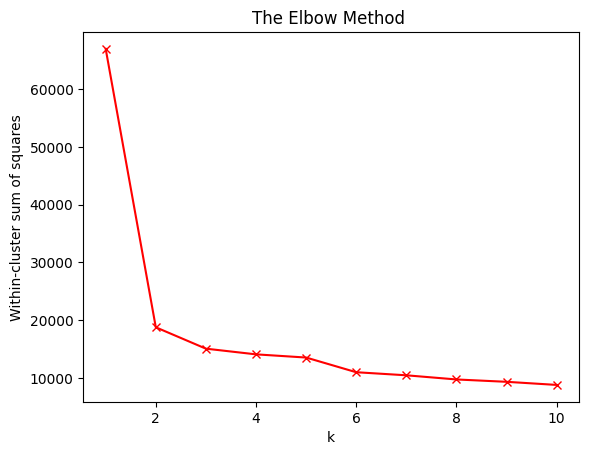

In [17]:
wcss_vec = count_wcss_scores(data, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'rx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method ')
plt.show()

>trudno dokladnie określić optymalną liczbę klastrów - kandydaci: 2

#### 5.2.2 metoda silhouette

In [18]:
# A w praktyce wygląda to tak:
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

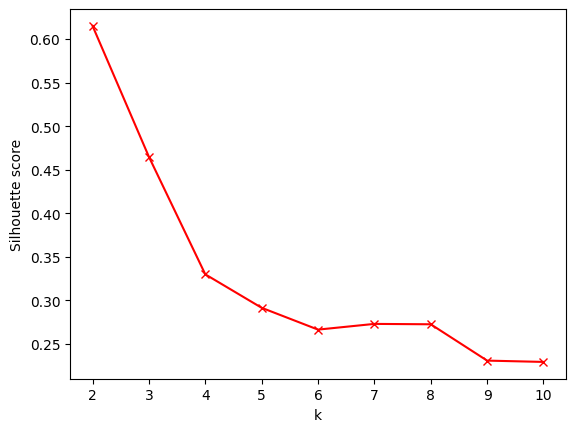

In [19]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(data, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

>(chcemy jak najwieksze silhouette score) 
zatem kandydaci to: 2, 7

#### 5.2.3 Calinski - Harabasz

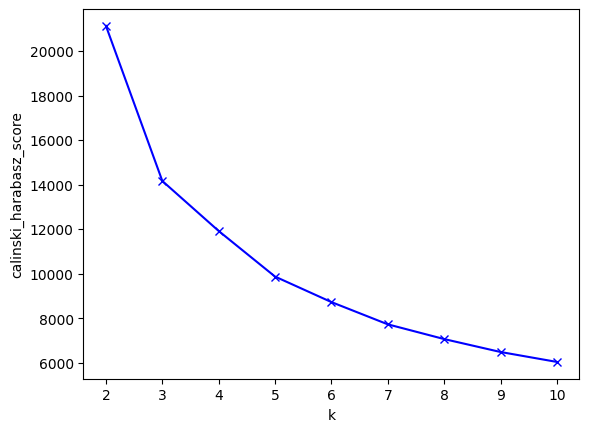

In [20]:
from sklearn.metrics import calinski_harabasz_score
cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
calinski_vec = count_clustering_scores(data, cluster_num_seq, KMeans, calinski_harabasz_score)
plt.plot(cluster_num_seq, calinski_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('calinski_harabasz_score')
plt.show()

>kandydat: 2

#### 5.2.4 davies bouldin

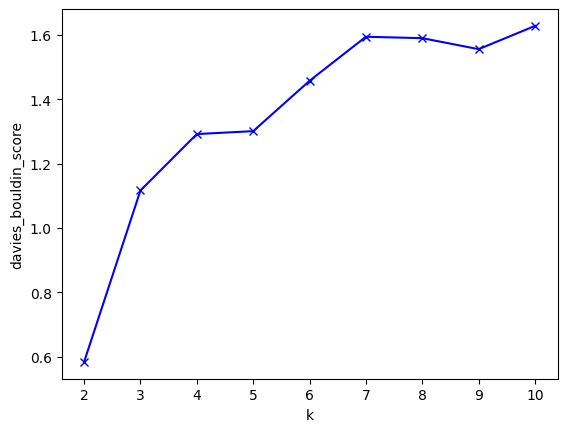

In [21]:
#davies_bouldin_score
from sklearn.metrics import davies_bouldin_score
cluster_num_seq = range(2, 11) 
davies_bouldin_vec = count_clustering_scores(data, cluster_num_seq, KMeans, davies_bouldin_score)
plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('davies_bouldin_score')
plt.show()


>kandydaci: 2, 5, 9

### 5.3 `DBSCAN`

#### 5.3.1 optymalne eps

[0.07940323 0.07940323 0.092345   ... 1.69601827 1.70674493 2.04716608]


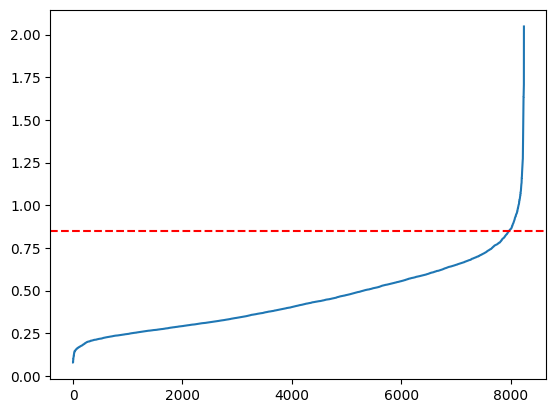

In [49]:
#knee method
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data)
distances, indices = nearest_neighbors.kneighbors(data)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.axhline(y=0.85, color='r', linestyle='--')
plt.show()

>optymalne eps = 0.85

### 5.3.2 Szukanie optymalnego min_samples

In [64]:
from sklearn.cluster import DBSCAN


min_samples_seq = range(1, 30)
silhouette = []
calinski = []
davies = []
n_clusters = []

for min_samples in min_samples_seq:
    dbscan = DBSCAN(eps=0.85, min_samples=min_samples, n_jobs=-1)
    y_dbscan = dbscan.fit_predict(data)
    silhouette.append(silhouette_score(data, y_dbscan))
    calinski.append(calinski_harabasz_score(data, y_dbscan))
    davies.append(davies_bouldin_score(data, y_dbscan))
    n_clusters.append(len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0))

# into dataframe
res = pd.DataFrame({'min_samples': min_samples_seq, 'silhouette': silhouette, 'calinski': calinski, 'davies': davies, 'n_clusters': n_clusters})



print(res)


    min_samples  silhouette     calinski    davies  n_clusters
0             1   -0.240860    86.160317  0.666241         316
1             2   -0.023036   502.515873  1.706678          44
2             3    0.087920  1184.180492  2.100612          18
3             4    0.096791  1734.055081  2.110564          12
4             5    0.143690  2273.775450  2.335734           9
5             6    0.109417  2274.602763  2.200696           9
6             7    0.156789  2888.890358  2.232586           7
7             8    0.134849  3332.126510  2.449951           6
8             9    0.162200  3360.151307  2.319601           6
9            10    0.158650  3357.471543  2.295417           6
10           11    0.155905  3989.692645  2.465753           5
11           12    0.155870  3995.471941  2.418993           5
12           13    0.154572  3996.326927  2.354906           5
13           14    0.154344  3997.890247  2.324023           5
14           15    0.091050  3952.923333  2.420415     

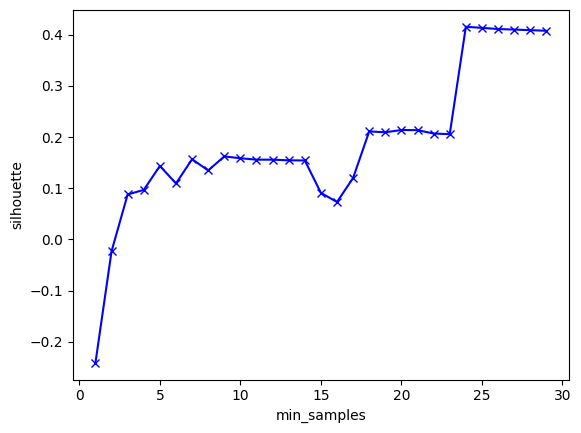

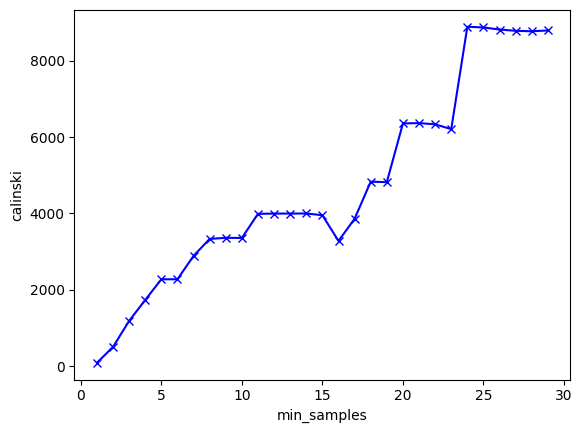

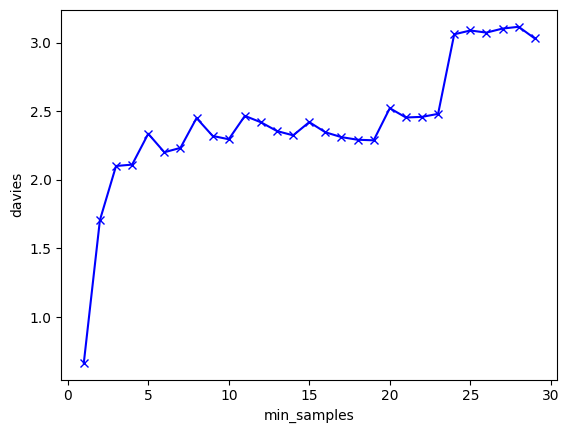

In [65]:
for col in ['silhouette', 'calinski', 'davies']:
    plt.plot(res['min_samples'], res[col], 'bx-')
    plt.xlabel('min_samples')
    plt.ylabel(col)
    plt.show()

>min_samples = 24? wtedy silhouette i caliski lepiej dzialaja, niestety davies nie...

### 5.4 `aglomerative clustering`

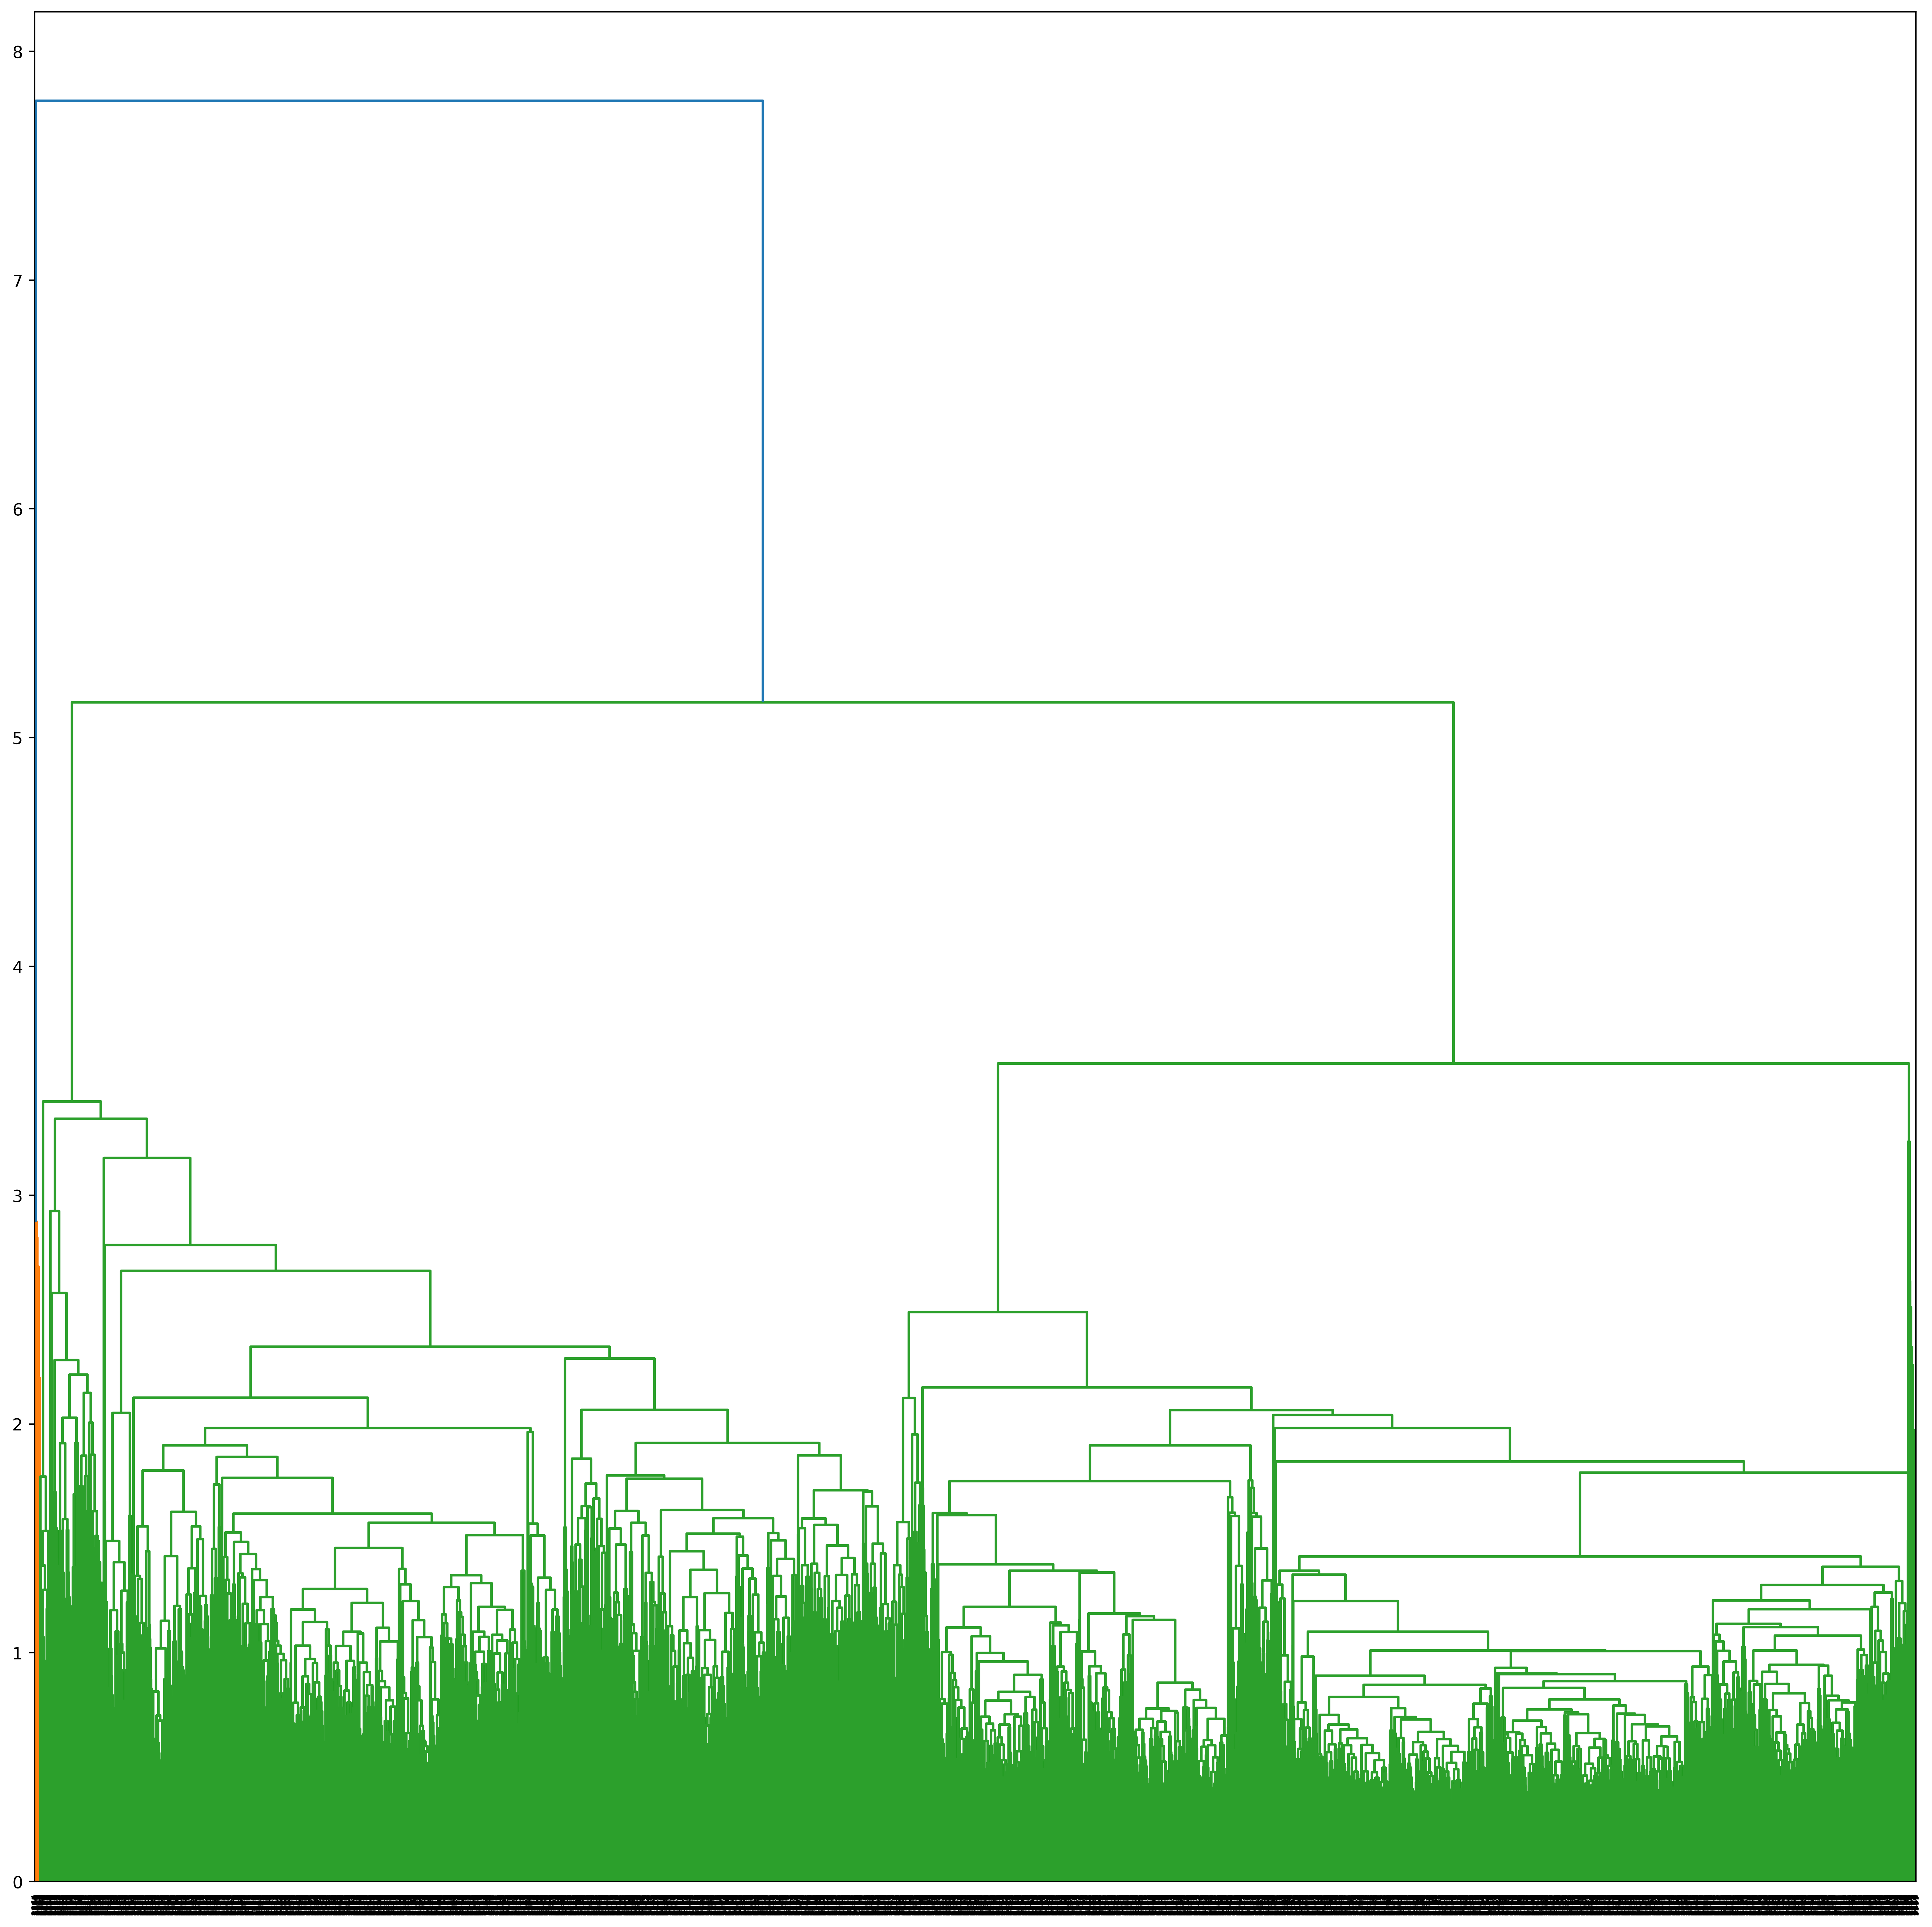

In [23]:
#aglomerative
from scipy.cluster import hierarchy

Z = hierarchy.linkage(data, method='average')
plt.figure(figsize=(20, 20), dpi= 400, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z, )
plt.show()


nie no zajebiscie to wyglada...

In [24]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=4)
y = model.fit_predict(data)

#scores
print("Silhouette score: ", silhouette_score(data, y))
print("Calinski harabasz score: ", calinski_harabasz_score(data, y))
print("Davies bouldin score: ", davies_bouldin_score(data, y))

Silhouette score:  0.5813561055854999
Calinski harabasz score:  10988.686346856086
Davies bouldin score:  0.6315848414895898
